In [1]:
%matplotlib inline

import sys
import PIL.Image
import scipy.misc, scipy.optimize, scipy.io, scipy.special
from numpy import *

import pylab
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab

from util import Util

EX_DIRECTORY_PATH = './data/'


def displayData( X, theta = None ):
    width = 20
    rows, cols = 10, 10
    out = zeros(( width * rows, width*cols ))

    rand_indices = random.permutation( 5000 )[0:rows * cols]

    counter = 0
    for y in range(0, rows):
        for x in range(0, cols):
            start_x = x * width
            start_y = y * width
            out[start_x:start_x+width, start_y:start_y+width] = X[rand_indices[counter]].reshape(width, width).T
            counter += 1

    img     = Util.toimage(out)
    figure  = pyplot.figure()
    axes    = figure.add_subplot(111)
    axes.imshow(img)


    if theta is not None:
        result_matrix     = []
        X_biased         = c_[ ones( shape(X)[0] ), X ]
        
        for idx in rand_indices:
            result = (argmax( theta.T.dot(X_biased[idx]) ) + 1) % 10
            result_matrix.append( result )

        result_matrix = array( result_matrix ).reshape( rows, cols ).transpose()
        print(result_matrix)

    pyplot.show( )


def sigmoid( z ):
    return scipy.special.expit(z)
    # return 1.0 / (1.0 + exp( -z ))

def computeCost( theta, X, y, lamda ):
    m = shape( X )[0]
    hypo        = sigmoid( X.dot( theta ) )
    term1        = log( hypo ).dot( -y )
    term2        = log( 1.0 - hypo ).dot( 1 - y )
    left_hand  = (term1 - term2) / m
    right_hand = theta.T.dot( theta ) * lamda / (2*m)
    return left_hand + right_hand

def gradientCost( theta, X, y, lamda ):
    m = shape( X )[0]
    grad = X.T.dot( sigmoid( X.dot( theta ) ) - y ) / m
    grad[1:] = grad[1:] + ( (theta[1:] * lamda ) / m )
    return grad

def oneVsAll( X, y, num_classes, lamda ):
    m,n         = shape( X )
    X             = c_[ones((m, 1)), X]
    all_theta     = zeros((n+1, num_classes))

    for k in range(0, num_classes):
        theta             = zeros(( n+1, 1 )).reshape(-1)
        temp_y             = ((y == (k+1)) + 0).reshape(-1)
        result             = scipy.optimize.fmin_cg( computeCost, fprime=gradientCost, x0=theta, \
                                                  args=(X, temp_y, lamda), maxiter=50, disp=False, full_output=True )
        all_theta[:, k] = result[0]
        print("%d Cost: %.5f\n"% (k+1, result[1]))

    # save( "all_theta.txt", all_theta )
    return all_theta

def predictOneVsAll( theta, X, y ):
    m,n = shape( X )
    X     = c_[ones((m, 1)), X]

    correct = 0
    for i in range(0, m ):
        prediction     = argmax(theta.T.dot( X[i] )) + 1
        actual         = y[i]
        # print "prediction = %d actual = %d" % (prediction, actual)
        if actual == prediction:
            correct += 1
    print("Accuracy: %.2f%%\n"%(correct * 100.0 / m ))

    
def part1_1():
    mat             = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex3data1.mat" )
    X, y             = mat['X'], mat['y']
    
    print("exdata1.mat loaded")
    
def part1_2():
    mat             = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex3data1.mat" )
    X, y             = mat['X'], mat['y']
    displayData( X )

def part1_3():
    mat              = scipy.io.loadmat( EX_DIRECTORY_PATH +  "ex3data1.mat" )
    X, y              = mat['X'], mat['y']
    m, n              = shape( X )
    input_layer_size = 400
    num_labels          = 10
    lamda              = 0.1

    theta = oneVsAll( X, y, num_labels, lamda )

def part1_4():
    mat              = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex3data1.mat" )
    X, y              = mat['X'], mat['y']
    m, n              = shape( X )
    input_layer_size = 400
    num_labels          = 10
    lamda              = 0.1

    theta = oneVsAll( X, y, num_labels, lamda )
    predictOneVsAll( theta, X, y )

    displayData( X, theta )

In [5]:
def main():
    set_printoptions(precision=6, linewidth=200)

In [6]:
    part1_1()

exdata1.mat loaded


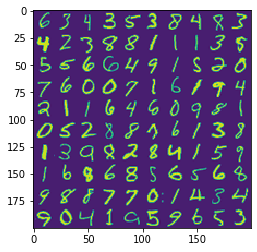

In [7]:
    part1_2()

In [8]:
    part1_3()

1 Cost: 0.01516

2 Cost: 0.05690

3 Cost: 0.06435

4 Cost: 0.03908

5 Cost: 0.06177

6 Cost: 0.02054

7 Cost: 0.03317

8 Cost: 0.08681

9 Cost: 0.07925

10 Cost: 0.01029



1 Cost: 0.01516

2 Cost: 0.05690

3 Cost: 0.06435

4 Cost: 0.03908

5 Cost: 0.06177

6 Cost: 0.02054

7 Cost: 0.03317

8 Cost: 0.08681

9 Cost: 0.07925

10 Cost: 0.01029

Accuracy: 94.92%

[[8 7 9 0 1 4 0 5 3 2]
 [3 7 8 7 7 8 2 8 5 1]
 [7 5 8 6 3 8 8 1 8 4]
 [9 0 5 9 8 8 0 8 2 5]
 [7 8 3 7 3 1 2 1 4 9]
 [1 1 8 3 5 6 6 1 1 7]
 [1 5 9 4 9 3 3 7 2 7]
 [7 2 3 3 9 0 9 1 3 3]
 [1 9 2 7 8 4 2 4 2 4]
 [3 6 6 8 4 7 6 4 9 3]]


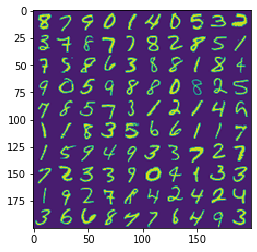

In [9]:
    part1_4()

In [10]:
if __name__ == '__main__':
    main()